# 6.2 Exploring Relationships

## This script contains the following:
### 1. Importing Visualization Libraries and Data
### 2. Exploring Relationships
 ##### Correlations
 ##### Scatterplots
 ##### Pair Plots
 ##### Categorical Plots
 ### 3.Research questions
 ### 4.Hypothesis 

### 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Checking matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
#importing data
df_rankings = pd.read_csv(r'/Users/nayeraibrahim/Documents/CF assignments/Own Project/rankings_columnsdropped.csv', index_col = False)

# 2. Exploring relationships

## The following variables will be investigated: world_rank, country, quality_of_education, alumni_employment, quality_of_faculty, publications

## Those variables will be used to explore the following questions 
- Where were the top 10 and top 100 universities located and how this changed from 2013 till 2015?
- What is the relationship between the quality of faculty staff and publications?
- What is the relationship between the quality of faculty staff and quality of education?
- What is the relationship between the quality of education and alumni employment?


In [4]:
# Create a subset including only the aforementioned columns

subset = df_rankings[['world_rank','country','quality_of_education','alumni_employment','quality_of_faculty', 'publications']]

### 2. Exploring Relationships
 ##### Correlations

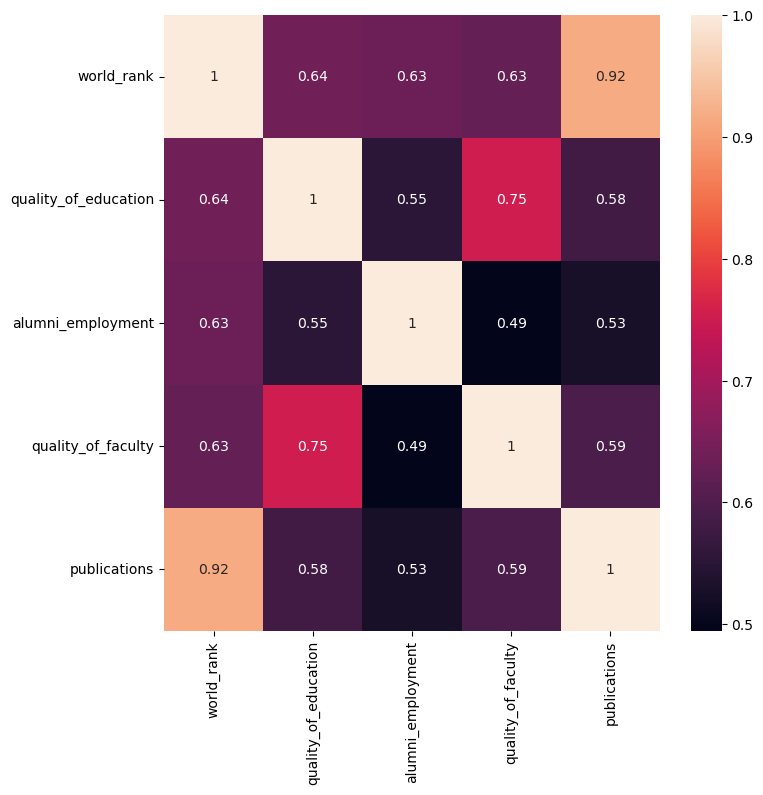

In [5]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset.corr(), annot = True, ax = ax) 

#A 0.92 coefficient indicates a strong positive correlation between the world rank and the rank of publications by a university  i.e. The higher the university rank, the higher it's publications ranking. This makes sense because a high university rank indicates a poor performing university.

#A 0.75 coefficient indicates a strong positive correlation between the quality of faculty in a university and the quality of education provided. This makes sense as both variables are directly proportional.

#A 0.59 coefficient indicates a strong positive correlation between the quality of faculty in a university and the university's publications. This makes sense because good quality staff tend to publish more academic papers.

#A 0.55 coefficient indicates a moderate positive correlation between the quality of education and the empolyment rate of the alumni .

 ##### Scatterplots

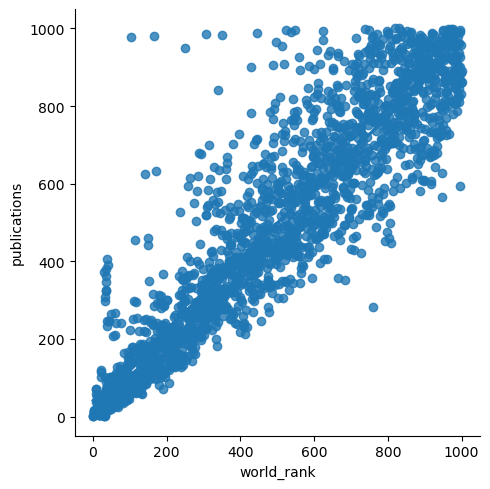

In [6]:
# Create a scatterplot for the "world rank" and "number of publications" columns in seaborn

sns.lmplot(x = 'world_rank', y = 'publications', data = df_rankings)

#It is interesting to see here that (with the exception of a few outliers) top universities rank high in terms of publications.

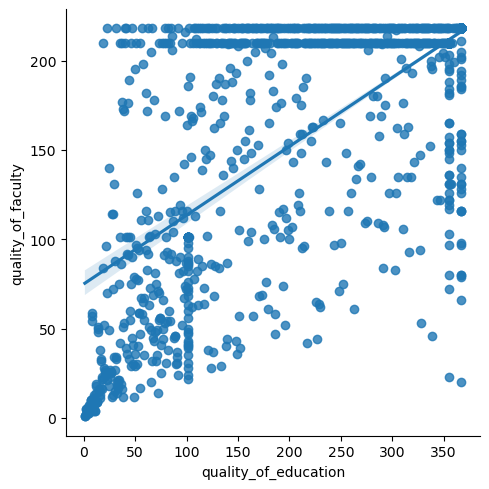

In [7]:
# Create a scatterplot for the "quality of faculty" and "quality of education" columns in seaborn

sns.lmplot(x = 'quality_of_education', y = 'quality_of_faculty', data = df_rankings)

#It is interesting to see that the relationship is hardly linear between the two variables

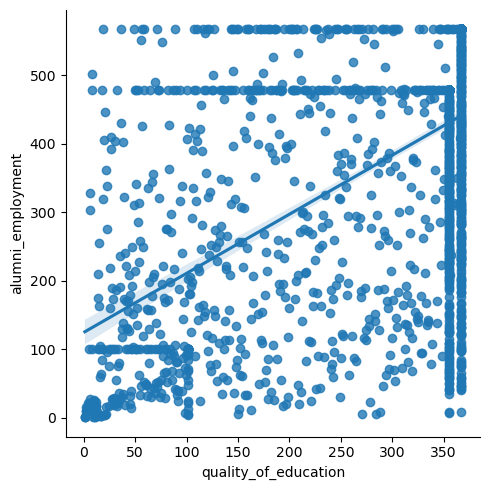

In [8]:
# Create a scatterplot for the "alumni employment" and "quality of education" columns in seaborn

sns.lmplot(x = 'quality_of_education', y = 'alumni_employment', data = df_rankings)

#Here it is also very interesting to see that a high quality of education does not mean that the alumni are employed

 ##### pair plots

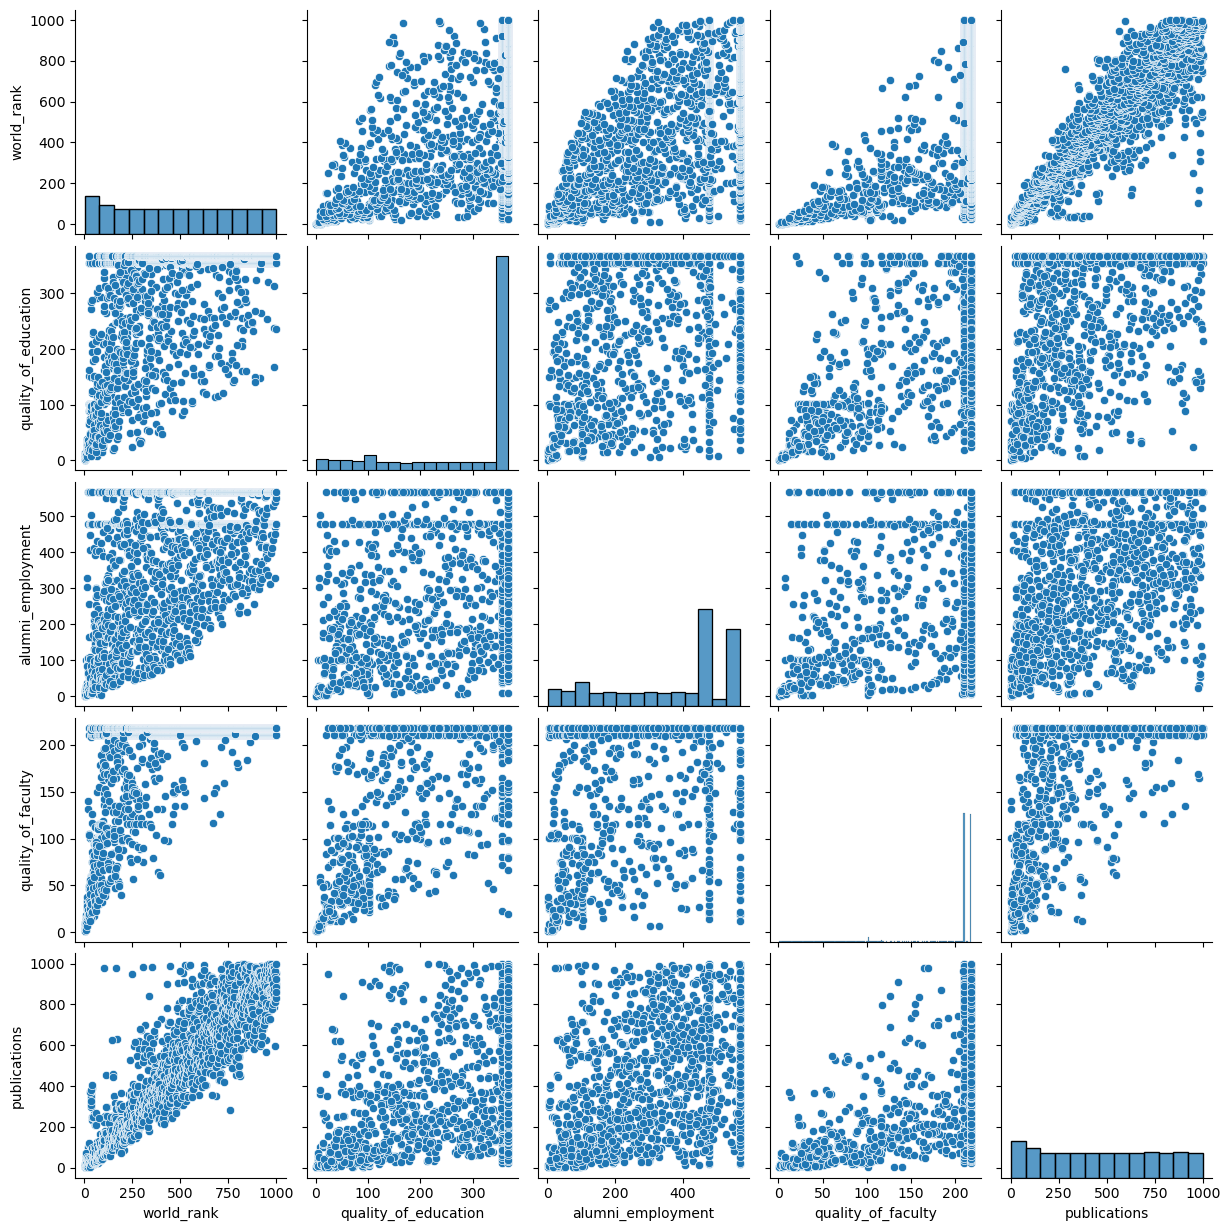

In [10]:
graph_pair = sns.pairplot(subset)

In [ ]:
###A linear relationship can be seen between the university rank and it's rank for publications. Other than that no linear relationships can be observed.

#### Categorical Plots

<AxesSubplot:xlabel='alumni_employment', ylabel='Count'>

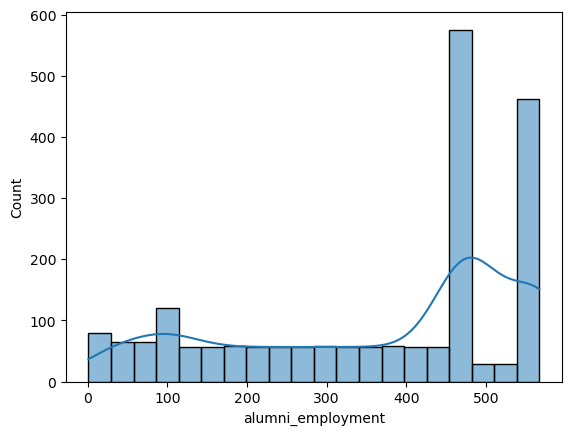

In [15]:
sns.histplot(df_rankings['alumni_employment'], bins = 20, kde = True)

In [16]:
df_rankings.loc[df_rankings['alumni_employment'] < 100, 'Rank category'] = 'Low rank'

In [17]:
df_rankings.loc[(df_rankings['alumni_employment'] >= 100) & (df_rankings['alumni_employment'] < 450), 'Rank category'] = 'Middle rank'

In [18]:
df_rankings.loc[df_rankings['alumni_employment'] >= 450, 'Rank category'] = 'High rank'

In [20]:
df_rankings['Rank category'].value_counts(dropna = False)

High rank      1102
Middle rank     759
Low rank        239
Name: Rank category, dtype: int64

KeyboardInterrupt: 

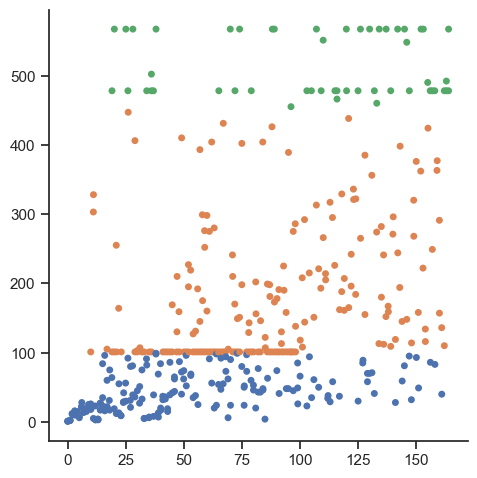

In [23]:
# Create a categorical plot in seaborn using the rank categories created above

sns.set(style="ticks")
graph = sns.catplot(x="world_rank", y="alumni_employment", hue="Rank category", data=df_rankings)

In [ ]:
##running this command took much time so I manually interrupted it. However the plot shows that most of the universities are have midlle ranging alumni employment ranks.

### 3. Research questions

In [ ]:
#-	Where were the top 10 and top 100 universities located and how this changed from 2013 till 2015?
# Not yet answered
#-	What is the relationship between the quality of faculty staff and publications? 
#The relationship is not directly proportional, unlike what was expected
#-	What is the relationship between the quality of faculty staff and the quality of education?
#The relationship is not directly proportional, unlike what was expected.
#-	What is the relationship between the quality of education and alumni employment?
#There is absolutely no relationship between those two variables

### 4. Hypothesis


In [ ]:
# The top 100 ranking universities in terms of publications are predominantly in the US
# The top 100 ranking universities in terms of quality of education are predominantly in Europe and UK
